### Daten einlesen und Vollständigkeitsprüfung


In [22]:
import pandas as pd

news = pd.read_csv('C:/Users/Admin/Desktop/DataSmart/Modul3/AI+ML/Project/Fakenews/news.csv')

# Überprüfen auf fehlende Daten
missing_data = news.isnull().sum()

# Anzeigen der ersten Zeilen des Datensatzes, fehlenden Daten und Shape
news.head(), print(missing_data), news.shape

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


(   Unnamed: 0                                              title  \
 0        8476                       You Can Smell Hillary’s Fear   
 1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
 2        3608        Kerry to go to Paris in gesture of sympathy   
 3       10142  Bernie supporters on Twitter erupt in anger ag...   
 4         875   The Battle of New York: Why This Primary Matters   
 
                                                 text label  
 0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
 1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
 2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
 3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
 4  It's primary day in New York and front-runners...  REAL  ,
 None,
 (6335, 4))

### Explorative Analyse

In [23]:
import matplotlib.pyplot as plt

# Anzahl FAKE und REAL News
fake_count = news[news['label'] == 'FAKE'].shape[0]
real_count = news[news['label'] == 'REAL'].shape[0]
    # .shape[0] dient dem Zählen der Zeilen im Dataframe mit dem vorherigen Kriterium

# Durchschnittliche Anzahl von Wörtern je Label auf 2 Nachkommastellen gerundet
average_word_count_fake = round(news[news['label'] == 'FAKE']['text'].apply(lambda x: len(x.split())).mean(), 2)
average_word_count_real = round(news[news['label'] == 'REAL']['text'].apply(lambda x: len(x.split())).mean(), 2)
    # erste [] wählt Zeilen im df "news" aus, die das == Kriterium erfüllen
    # zweite [] wählt Spalte "text" aus
    # apply(lambda x: len(x.split())) zerlegt die Zeile in Wörter um diese zählen
    # mean ist der Durchschnitt und round zusammen mit der 2 gibt die Anzahl der Nachkommastellen

# Durchschnittliche Titellänge je Label auf 2 Nachkommastellen gerundet
average_title_length_fake = round(news[news['label'] == 'FAKE']['title'].apply(lambda x: len(x)).mean(), 2)
average_title_length_real = round(news[news['label'] == 'REAL']['title'].apply(lambda x: len(x)).mean(), 2)
    # ähnlich wie beim Wörterzählen, jedoch gibt es bei len keinen Split, sodass die Zeichen statt Wörter gezählt werden

# Erstellung einer DataFrame
exploration = {
    'Label': ['FAKE', 'REAL'],
    'Anzahl News': [fake_count, real_count],
    'Durchschnitt Wörter': [average_word_count_fake, average_word_count_real],
    'Durchschnitt Titellänge': [average_title_length_fake, average_title_length_real]
}
df = pd.DataFrame(exploration)

# Ausgabe der DataFrame
print(df)


  Label  Anzahl News  Durchschnitt Wörter  Durchschnitt Titellänge
0  FAKE         3164               679.13                    69.18
1  REAL         3171               873.26                    61.38


#### Visualisierung

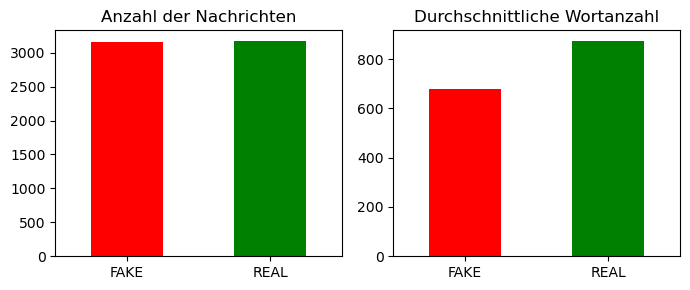

In [46]:
import matplotlib.pyplot as plt

# Erstellung einer Figure und Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Barplot für Anzahl der Nachrichten
df.plot(kind='bar', x='Label', y='Anzahl News', ax=axes[0], color=['red', 'green'])
axes[0].set_title('Anzahl der Nachrichten')
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].get_legend().remove()

# Barplot für durchschnittliche Wortanzahl
df.plot(kind='bar', x='Label', y='Durchschnitt Wörter', ax=axes[1], color=['red', 'green'])
axes[1].set_title('Durchschnittliche Wortanzahl')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].get_legend().remove()

# Namen auf der X-Achse horizontal anzeigen
axes[0].set_xticklabels(df['Label'], rotation=0)
axes[1].set_xticklabels(df['Label'], rotation=0)

# Layout anpassen
plt.tight_layout()

# Diagramm anzeigen
plt.show()


#### Define Data - TF-IDF (Term Frequency-Inverse Document Frequency)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Merkmale extrahieren
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
    # Wandelt Text in Zahlen um,
    # Wichtigkeit eines Wortes relativ zu seiner Häufigkeit im Dokument
    # hierbei werden nur die 2000 häufigsten Wörter als Merkmale definiert
X = tfidf_vectorizer.fit_transform(news['text']) # setzt die neuen Text-Zahlen als X
y = news['label'] # setzt die FAKE/REAL Klassifikation als Y

#### Train/Test Split 

<sub> Beim Durchlauf des Code fiel auf, dass ein 90:10 Split je nach Modell merklich höhere Accuracy hervor ruft als der Standard 80:20 Split  
Daher werden beide Data-Splits verwendet und in jedem Modell durchlaufen

In [26]:
from sklearn.model_selection import train_test_split

# Testgrößen definieren
test_sizes = [0.2, 0.1]

### Naive Bayes (NB)

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for test_size in test_sizes:
    # Trainings- und Testdaten aufteilen; dies innerhalb der test_sizes Schleife, damit dies je definierter Splitgröße erfolgt
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Naive Bayes-Modell trainieren
    naive_bayes = MultinomialNB()
    naive_bayes.fit(X_train, y_train)

    # Modell evaluieren
    y_pred_nb = naive_bayes.predict(X_test)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    precision_nb = precision_score(y_test, y_pred_nb, pos_label='REAL')
    recall_nb = recall_score(y_test, y_pred_nb, pos_label='REAL')
    f1_nb = f1_score(y_test, y_pred_nb, pos_label='REAL')
    report_nb = classification_report(y_test, y_pred_nb)
    conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

    # Ausgabe
    print(f"Testgröße: {test_size}")
        # das f dient dazu den String formatieren zu können um so die jeweilige test_size (also 0.2 oder 0.1) zu ziehen
    print("Genauigkeit des Naive Bayes-Modells:", accuracy_nb)
    print("Confusion Matrix:")
    print(conf_matrix_nb)
    print("Classification Report:")
    print(report_nb)
    print("--------------------------------------------------")
        # dies dient als Trennlinie zur Übersichtlichkeit


Testgröße: 0.2
Genauigkeit des Naive Bayes-Modells: 0.8839779005524862
Confusion Matrix:
[[573  55]
 [ 92 547]]
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.86      0.91      0.89       628
        REAL       0.91      0.86      0.88       639

    accuracy                           0.88      1267
   macro avg       0.89      0.88      0.88      1267
weighted avg       0.89      0.88      0.88      1267

--------------------------------------------------
Testgröße: 0.1
Genauigkeit des Naive Bayes-Modells: 0.8769716088328076
Confusion Matrix:
[[280  36]
 [ 42 276]]
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.87      0.89      0.88       316
        REAL       0.88      0.87      0.88       318

    accuracy                           0.88       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.88      0.88      0.88       634

-------------------------

### Random Forest (RF)

In [28]:
from sklearn.ensemble import RandomForestClassifier

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Random Forest-Modell trainieren
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)

    # Modell evaluieren
    y_pred_rf = random_forest.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf, pos_label='REAL')
    recall_rf = recall_score(y_test, y_pred_rf, pos_label='REAL')
    f1_rf = f1_score(y_test, y_pred_rf, pos_label='REAL')
    report_rf = classification_report(y_test, y_pred_rf)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

    # Ausgabe
    print(f"Testgröße: {test_size}")
    print("Genauigkeit des Random Forest-Modells:", accuracy_rf)
    print("Confusion Matrix:")
    print(conf_matrix_rf)
    print("Classification Report:")
    print(report_rf)
    print("--------------------------------------------------")


Testgröße: 0.2
Genauigkeit des Random Forest-Modells: 0.9116022099447514
Confusion Matrix:
[[579  49]
 [ 63 576]]
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.90      0.92      0.91       628
        REAL       0.92      0.90      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

--------------------------------------------------
Testgröße: 0.1
Genauigkeit des Random Forest-Modells: 0.919558359621451
Confusion Matrix:
[[292  24]
 [ 27 291]]
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.92      0.92      0.92       316
        REAL       0.92      0.92      0.92       318

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634

----------------------

### Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Support Vector Machine-Modell trainieren
    svm = SVC()
    svm.fit(X_train, y_train)

    # Modell evaluieren
    y_pred_svm = svm.predict(X_test)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    precision_svm = precision_score(y_test, y_pred_svm, pos_label='REAL')
    recall_svm = recall_score(y_test, y_pred_svm, pos_label='REAL')
    f1_svm = f1_score(y_test, y_pred_svm, pos_label='REAL')
    report_svm = classification_report(y_test, y_pred_svm)
    conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

    # Ausgabe
    print(f"Testgröße: {test_size}")
    print("Genauigkeit des Support Vector Machine-Modells:", accuracy_svm)
    print("Confusion Matrix:")
    print(conf_matrix_svm)
    print("Classification Report:")
    print(report_svm)
    print("--------------------------------------------------")


Testgröße: 0.2
Genauigkeit des Support Vector Machine-Modells: 0.9289660615627466
Confusion Matrix:
[[587  41]
 [ 49 590]]
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.92      0.93      0.93       628
        REAL       0.94      0.92      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

--------------------------------------------------
Testgröße: 0.1
Genauigkeit des Support Vector Machine-Modells: 0.9211356466876972
Confusion Matrix:
[[293  23]
 [ 27 291]]
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.92      0.93      0.92       316
        REAL       0.93      0.92      0.92       318

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634

---

### Logistische Regression (LR)

In [30]:
from sklearn.linear_model import LogisticRegression

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Logistische Regression-Modell trainieren
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train, y_train)

    # Modell evaluieren
    y_pred_lr = logistic_regression.predict(X_test)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    precision_lr = precision_score(y_test, y_pred_lr, pos_label='REAL')
    recall_lr = recall_score(y_test, y_pred_lr, pos_label='REAL')
    f1_lr = f1_score(y_test, y_pred_lr, pos_label='REAL')
    report_lr = classification_report(y_test, y_pred_lr)
    conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

    # Ausgabe
    print(f"Testgröße: {test_size}")
    print("Genauigkeit der Logistischen Regression:", accuracy_lr)
    print("Confusion Matrix:")
    print(conf_matrix_lr)
    print("Classification Report:")
    print(report_lr)
    print("--------------------------------------------------")


Testgröße: 0.2
Genauigkeit der Logistischen Regression: 0.914759273875296
Confusion Matrix:
[[575  53]
 [ 55 584]]
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.91      0.92      0.91       628
        REAL       0.92      0.91      0.92       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

--------------------------------------------------
Testgröße: 0.1
Genauigkeit der Logistischen Regression: 0.9132492113564669
Confusion Matrix:
[[290  26]
 [ 29 289]]
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.91      0.92      0.91       316
        REAL       0.92      0.91      0.91       318

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634

------------------

### Gradient Boosting Machine (GBM)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Gradient Boosting Machine-Modell trainieren
    gradient_boosting = GradientBoostingClassifier()
    gradient_boosting.fit(X_train, y_train)

    # Modell evaluieren
    y_pred_gb = gradient_boosting.predict(X_test)
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    precision_gb = precision_score(y_test, y_pred_gb, pos_label='REAL')
    recall_gb = recall_score(y_test, y_pred_gb, pos_label='REAL')
    f1_gb = f1_score(y_test, y_pred_gb, pos_label='REAL')
    report_gb = classification_report(y_test, y_pred_gb)
    conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

    # Ausgabe
    print(f"Testgröße: {test_size}")
    print("Genauigkeit der Gradient Boosting Machine:", accuracy_gb)
    print("Confusion Matrix:")
    print(conf_matrix_gb)
    print("Classification Report:")
    print(report_gb)
    print("--------------------------------------------------")


Testgröße: 0.2
Genauigkeit der Gradient Boosting Machine: 0.9005524861878453
Confusion Matrix:
[[567  61]
 [ 65 574]]
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.90      0.90      0.90       628
        REAL       0.90      0.90      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267

--------------------------------------------------
Testgröße: 0.1
Genauigkeit der Gradient Boosting Machine: 0.8943217665615142
Confusion Matrix:
[[282  34]
 [ 33 285]]
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.90      0.89      0.89       316
        REAL       0.89      0.90      0.89       318

    accuracy                           0.89       634
   macro avg       0.89      0.89      0.89       634
weighted avg       0.89      0.89      0.89       634

-------------

### K-Nearest Neighbor (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # K-Nearest Neighbor-Modell trainieren
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    # Modell evaluieren
    y_pred_knn = knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    precision_knn = precision_score(y_test, y_pred_knn, pos_label='REAL')
    recall_knn = recall_score(y_test, y_pred_knn, pos_label='REAL')
    f1_knn = f1_score(y_test, y_pred_knn, pos_label='REAL')
    report_knn = classification_report(y_test, y_pred_knn)
    conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

    # Ausgabe
    print(f"Testgröße: {test_size}")
    print("Genauigkeit des K-Nearest Neighbor-Modells:", accuracy_knn)
    print("Confusion Matrix:")
    print(conf_matrix_knn)
    print("Classification Report:")
    print(report_knn)
    print("--------------------------------------------------")


Testgröße: 0.2
Genauigkeit des K-Nearest Neighbor-Modells: 0.8310970797158642
Confusion Matrix:
[[515 113]
 [101 538]]
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.84      0.82      0.83       628
        REAL       0.83      0.84      0.83       639

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267

--------------------------------------------------
Testgröße: 0.1
Genauigkeit des K-Nearest Neighbor-Modells: 0.832807570977918
Confusion Matrix:
[[261  55]
 [ 51 267]]
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.84      0.83      0.83       316
        REAL       0.83      0.84      0.83       318

    accuracy                           0.83       634
   macro avg       0.83      0.83      0.83       634
weighted avg       0.83      0.83      0.83       634

------------

### Vergleich der Modelle anhand Report-Werte  
<sub>diese wurden im Vorfeld bei den einzelnen Modellen bereits generiert und gespeichert  
Es sollen 2 Tabellen erzeugt werden, d.h. je Splitgröße, welche die Scoring-Werte den Modellen gegenüber stellt  
Hierzu ist es notwendig, dass die jeweiligen Werte für 0.1 und 0.2 je Modell noch einmal errechnet und einem entsprechenden Wert zugewiesen werden    
  

##### Werte erstellen

In [33]:
# Liste der Modelle
models = [
    ("Naive Bayes", MultinomialNB()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("Logistische Regression", LogisticRegression()),
    ("GBM", GradientBoostingClassifier()),
    ("KNN", KNeighborsClassifier())
]

# Leere Listen für Testgröße 0.2
accuracy_02 = []
precision_02 = []
recall_02 = []
f1_02 = []
conf_matrix_02 = []

# Leere Listen für Testgröße 0.1
accuracy_01 = []
precision_01 = []
recall_01 = []
f1_01 = []
conf_matrix_01 = []

# Äußere Schleife für Durchführung je Modell
for model_name, model_instance in models:
    # Innere Schleife für Durchführung je Testgrößen
    for test_size in test_sizes:
        # Trainings- und Testdaten aufteilen
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Modell trainieren
        model_instance.fit(X_train, y_train)

        # Modell evaluieren
        y_pred = model_instance.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label='REAL')
        recall = recall_score(y_test, y_pred, pos_label='REAL')
        f1 = f1_score(y_test, y_pred, pos_label='REAL')
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Scorings für Testgröße 0.2 hinzufügen
        if test_size == 0.2:
            accuracy_02.append(accuracy)
            precision_02.append(precision)
            recall_02.append(recall)
            f1_02.append(f1)
            conf_matrix_02.append(conf_matrix)
        # Scorings für Testgröße 0.1 hinzufügen
        elif test_size == 0.1:
            accuracy_01.append(accuracy)
            precision_01.append(precision)
            recall_01.append(recall)
            f1_01.append(f1)
            conf_matrix_01.append(conf_matrix)

##### Tabellen erstellen

In [34]:
# Erstellung einer Tabelle für Testgröße 0.2
data_02 = {
    "Modell": [model[0] for model in models],
    "Accuracy": accuracy_02,
    "Precision": precision_02,
    "Recall": recall_02,
    "F1-Score": f1_02
}
df_02 = pd.DataFrame(data_02)

# Erstellung einer Tabelle für Testgröße 0.1
data_01 = {
    "Modell": [model[0] for model in models],
    "Accuracy": accuracy_01,
    "Precision": precision_01,
    "Recall": recall_01,
    "F1-Score": f1_01
}
df_01 = pd.DataFrame(data_01)

# Anzeigen der Tabellen je Testgröße
print("Tabelle für Testgröße 0.2:")
print(df_02)
print("--------------------------------------------------")
print("Tabelle für Testgröße 0.1:")
print(df_01)

Tabelle für Testgröße 0.2:
                   Modell  Accuracy  Precision    Recall  F1-Score
0             Naive Bayes  0.883978   0.908638  0.856025  0.881547
1           Random Forest  0.919495   0.921507  0.918623  0.920063
2                     SVM  0.928966   0.935024  0.923318  0.929134
3  Logistische Regression  0.914759   0.916797  0.913928  0.915361
4                     GBM  0.900552   0.903937  0.898279  0.901099
5                     KNN  0.831097   0.826421  0.841941  0.834109
--------------------------------------------------
Tabelle für Testgröße 0.1:
                   Modell  Accuracy  Precision    Recall  F1-Score
0             Naive Bayes  0.876972   0.884615  0.867925  0.876190
1           Random Forest  0.927445   0.938710  0.915094  0.926752
2                     SVM  0.921136   0.926752  0.915094  0.920886
3  Logistische Regression  0.913249   0.917460  0.908805  0.913112
4                     GBM  0.894322   0.893417  0.896226  0.894819
5                     KN

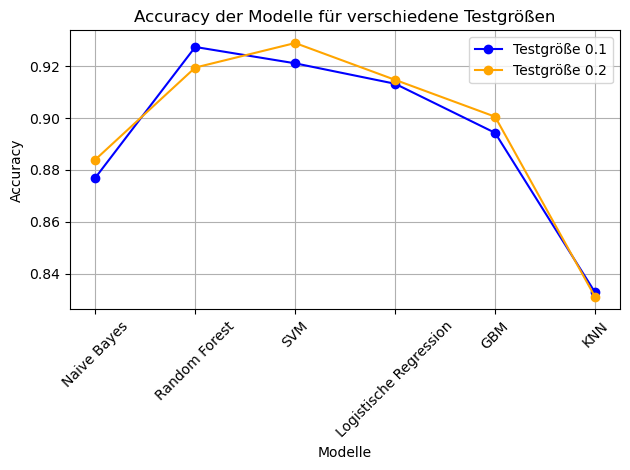

In [35]:
# Modelle als Labels für die x-Achse
labels = ["Naive Bayes", "Random Forest", "SVM", "Logistische Regression", "GBM", "KNN"]

# Plot der Accuracy für Testgröße 0.1
plt.plot(labels, accuracy_01, marker='o', label='Testgröße 0.1', color='blue')

# Plot der Accuracy für Testgröße 0.2
plt.plot(labels, accuracy_02, marker='o', label='Testgröße 0.2', color='orange')

# Beschriftungen der Achsen und Titel
plt.xlabel('Modelle')
plt.ylabel('Accuracy')
plt.title('Accuracy der Modelle für verschiedene Testgrößen')
plt.legend()

# Anzeigen der Grafik
plt.xticks(rotation=45)  # Rotiere die x-Achsenbeschriftungen für bessere Lesbarkeit
plt.grid(True)
plt.tight_layout()
plt.show()



## Es ist also folgende Erkenntnis aus der Analyse zu ziehen:  
Bei einer Testgröße von 0.2 ist die Support Vector Machine die beste Wahl mit einer Genauigkeit von 92.9%  
Bei einer Testgröße von 0.1 ist die Random Forest Methode die beste Wahl mit einer Genauigkeit von 92.4%   

Insgesamt ist es also ratsam den Standard-Split von 80:20 und SVM zu nutzen, da es den insgesamt höchsten Wert erzielte